<a href="https://colab.research.google.com/github/Fcazarez/RRC_Intro_AI_Project2/blob/main/Copy_of_Project2_Intro_AI_Random_Forest_Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP-3703 (241551) Introduction to Artificial Intelligence**
# **Project 2 - Random Forests and Ensembles**
# **Felix Cazarez**


**Objective:**
* The goal of the project is to successfully train and test
* a random forest,
* compare it to a decision tree and
* knn classifier.
* Also to train a simple stacking ensemble using a dt,
* knn and
* svm as base learners and
* a random forest as the meta-model.

**Instructions:**

* From the Caltech-UCSD CUB-200-2011 data set you will need image_attribute_labels.txt and image_class_labels.txt they can be found at the following links:

* http://www.vision.caltech.edu/datasets/cub_200_2011/
* https://drive.google.com/drive/folders/1kFzIqZL_pEBVR7Ca_8IKibfWoeZc3GT1


# **Task 1: Data Preprocessing**
* A correspondence should set up between the attributes and the labels. The aim is to set up a structure where each image's attributes can be related to its label.

By the end, there are separate numpy arrays for training/testing attributes and their corresponding labels.

In other words, your code takes two separate data sources – one with image attributes and the other with image labels – and processes them to form training and testing datasets where machine learning algorithms can learn the relationship between attributes and their corresponding labels.

## **1.1 The Data:**

* The first file "image_attribute_labels.txt" contains information about image attributes. It is read with space as a delimiter(‘\s+)
* Only the first three columns should be loaded (‘igid’,’attid’,’present’)
* The second file “image_class_labels.txt” has class labels for the image. It is read with space delimeter too.
* Output the heads of both files, and the file sizes/shapes. Discuss contents in detail.

## **1.2 Handling Bad Entries:**
* Occasionally, files may contain corrupted or wrongly formatted lines. We use the on_bad_lines='skip' argument to ensure such lines are skipped during loading.
* Use the pandas library to load the two text files, image_attribute_labels.txt and image_class_labels.txt. Name them imgatt, and imglabels, respectively.
* Always inspect the loaded data using methods like head(), info(), or describe() to understand its structure and to identify any inconsistencies.
* Output shape, and head of the image attributes

In [1]:
#Importing libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import ( train_test_split,
                                      cross_val_score,
                                      GridSearchCV
                                    )
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate

In [2]:
#!pip install --upgrade google-colab

In [3]:
#folder was downloaded and uploaded to my gdrive to be recovered here in this notebook with python
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)

Mounted at /content/gdrive


In [4]:
# Define the base directory
base_directory = '/content/gdrive/MyDrive/Colab Notebooks/CUB_200_2011/'

# Define file paths
path_image_attr_abels = f'{base_directory}attributes/image_attribute_labels.txt'
path_class_labels = f'{base_directory}image_class_labels.txt'


In [5]:

# Read the first file (image attributes)
imgatt = pd.read_csv(path_image_attr_abels, sep='\s+', usecols=[0, 1, 2], on_bad_lines='skip', names=["imgid", "attid", "present"])


In [6]:
# Display the first few rows of the image attributes DataFrame
print("=" * 30 + " Attributes " + "=" * 30)

print("Shape of image_attribute_labels.txt :", imgatt.shape)
print(" Head " + "=" * 30)
print("head of the data:", imgatt.head())
print(" Describe " + "=" * 30)
print(imgatt.describe().round(2))

============================== Attributes ==============================
Shape of image_attribute_labels.txt : (3677856, 3)
 Head ==============================
head of the data:    imgid  attid  present
0      1      1        0
1      1      2        0
2      1      3        0
3      1      4        0
4      1      5        1
 Describe ==============================
            imgid       attid    present
count  3677856.00  3677856.00  3677856.0
mean      5894.50      156.50        0.1
std       3402.90       90.07        0.3
min          1.00        1.00        0.0
25%       2947.75       78.75        0.0
50%       5894.50      156.50        0.0
75%       8841.25      234.25        0.0
max      11788.00      312.00        1.0


In [7]:

# Read the second file (class labels)
imglabels = pd.read_csv(path_class_labels, header=None, sep='\s+', on_bad_lines='skip', names=["imgid", "classid"])

In [8]:
# Display the first few rows of the class labels DataFrame
print("=" * 30 + " Labels " + "=" * 30)
print("Shape of image_class_labels.txt :", imglabels.shape)
print(" Head " + "=" * 30)
print(imglabels.head())
print(" Describe " + "=" * 30)
print(imglabels.describe().round(2))

============================== Labels ==============================
Shape of image_class_labels.txt : (11788, 2)
 Head ==============================
   imgid  classid
0      1        1
1      2        1
2      3        1
3      4        1
4      5        1
 Describe ==============================
          imgid   classid
count  11788.00  11788.00
mean    5894.50    101.13
std     3403.05     57.48
min        1.00      1.00
25%     2947.75     51.00
50%     5894.50    101.00
75%     8841.25    151.00
max    11788.00    200.00


**Comments:**

**Attributes:**

* Shape of the image_attribute_labels.txt file: (3677856, 3)
* The dataset contains a large number of records (3677856).
* The present column indicates whether a specific attribute is present (1) or not (0) for an image.
* The dataset is quite sparse, with a mean of 0.1 and a standard deviation of 0.3.
* This suggests that most attributes are not present in the images.

For the attributes, it appears that the majority of attributes are not present in the images, as indicated by the low mean value and high standard deviation.

**Labels:**

* Shape of the image_class_labels.txt file: (11788, 2)
* There are 11788 unique images in the dataset.
* The class labels range from 1 to 200, and the mean class label is approximately 101.13.
* The dataset is relatively evenly distributed among classes, with a minimum class label of 1 and a maximum of 200.

For the labels, the dataset contains a diverse set of images distributed across 200 classes, with a relatively even distribution among classes.

In [9]:
# Check  duplicate
imgatt.drop_duplicates(inplace=True)
imglabels.drop_duplicates(inplace=True)
print("=" * 30 + " Attributes " + "=" * 30)
print(imgatt.info())
print("=" * 30 + " Labels " + "=" * 30)
print(imglabels.info())

============================== Attributes ==============================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677856 entries, 0 to 3677855
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   imgid    int64
 1   attid    int64
 2   present  int64
dtypes: int64(3)
memory usage: 112.2 MB
None
============================== Labels ==============================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11788 entries, 0 to 11787
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   imgid    11788 non-null  int64
 1   classid  11788 non-null  int64
dtypes: int64(2)
memory usage: 276.3 KB
None


## **1.3 Data Transformation:**
* The data from image_attribute_labels.txt needs to be transformed from a long format to a wide format.
* The pivot method in pandas will help transform the data such that each image ID has all the attributes associated with it in separate columns.
* Make sure there are no duplicates or pivot will give you an error.
* Name this imgatt2.
* Output the head of the new arrangement; and the number of rows and columns

In [10]:
# Pivot the data to wide format
#This code uses the .pivot() method from the pandas library to transform the imgatt DataFrame from a long format to a wide format.
#The index parameter specifies that the 'imgid' column should be used as the index (rows) in the new DataFrame.
#The columns parameter specifies that the 'attid' column values should be used as columns in the new DataFrame.
#The values parameter specifies that the 'present' column values should be placed in the corresponding cells of the new DataFrame.
imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')

# Output the head of the new arrangement
print("=" * 30 + " Attributes 2 (wide format) " + "=" * 30)
print(imgatt2.head())

# Number of rows and columns
num_rows, num_columns = imgatt2.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


============================== Attributes 2 (wide format) ==============================
attid  1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5        0    0    0    0    1    0    0    0    0    0  ...    0    0    1   

attid  306  307  308  309  310  311  312  
imgid                                     
1        0    0    1    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    1    0    0    1    0  
4        1    0    0    1    0    0    0  
5        0    0    0    0    0    0    0  

[5 rows x 312 columns]
Number of rows: 11788
Number of 

In [11]:
# Check duplicates
imgatt2.drop_duplicates(inplace=True)
imglabels.drop_duplicates(inplace=True)

In [12]:
# Check Nan
imgatt2.dropna(inplace=True)
imglabels.dropna(inplace=True)

In [13]:
print(imgatt2.info())
print(imglabels.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11757 entries, 1 to 11788
Columns: 312 entries, 1 to 312
dtypes: int64(312)
memory usage: 28.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11788 entries, 0 to 11787
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   imgid    11788 non-null  int64
 1   classid  11788 non-null  int64
dtypes: int64(2)
memory usage: 276.3 KB
None


## **1.4 Data Merging and Shuffle:**
* Set your imglabels data index to “imgid"
* Merge the two dataframes on a common column, "imgid" to create a new dataframe
* Randomly shuffle your dataframe using .sample with frac=1, and random_state=10. (I want this reproducible)
* Split your new dataframe into attributes and labels where your attributes contains all columns but the last. Your labels contain only the last column.
* Using .iloc is useful here as it preserves indexing.
* Convert to a numpy arrays
* Flatten your labels

In [14]:
random_seed = 42
np.random.seed(random_seed) # this seed make it reproductible

# Set the index for imglabels data to "imgid"
imglabels.set_index("imgid", inplace=True)

# Merge the two dataframes using the column "imgid"
merged_df = pd.merge(imgatt2, imglabels, on="imgid")

# Randomly shuffle the df
shuffled_data = merged_df.sample(frac=1, random_state=random_seed)  # Use the same seed

# Split df into attributes and labels
attributes = shuffled_data.iloc[:, :-1]
labels = shuffled_data.iloc[:, -1]

# Convert to numpy arrays
attributes_np_array = attributes.values
labels_np_array = labels.values

# Flatten the labels
labels_flatten = labels_np_array.flatten()

print("Shape of attributes_array:", attributes_np_array.shape)
print("Shape of labels_array:", labels_flatten.shape)


Shape of attributes_array: (11757, 312)
Shape of labels_array: (11757,)


# **2. Training and Testing Sets**
* Create your training and testing sets.

In [15]:
# We will use the train_test_split function from sklearn to split our data into training and testing sets.
# We are reserving 20% of the data for testing.
# The random_state parameter ensures that the splits generate are reproducible.
X_train, X_test, y_train, y_test = train_test_split(attributes_np_array, labels_flatten, test_size=0.2, random_state=42)

# Let's print the shapes of our training and testing sets to verify everything is as expected.
print("Training and testing set split successful!")
print(f"Shape of X_train (training data): {X_train.shape}")
print(f"Shape of X_test (testing data): {X_test.shape}")
print(f"Shape of y_train (training labels): {y_train.shape}")
print(f"Shape of y_test (testing labels): {y_test.shape}")


Training and testing set split successful!
Shape of X_train (training data): (9405, 312)
Shape of X_test (testing data): (2352, 312)
Shape of y_train (training labels): (9405,)
Shape of y_test (testing labels): (2352,)


# **3.Random Forest Classifier:**
* Implement a Random Forest classifier. With max features=15, and 25 trees.
* Train the classifier on the training data and test its performance on the testing data.
* Print the training and testing accuracies. What do the scores suggest?

In [16]:
# Create a Random Forest classifier with specific parameters
rf_classifier = RandomForestClassifier(max_features=15, n_estimators=25, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict labels on both the training and testing data
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

data = {
    'Model': ['Random Forest'],
    'Max_features': ['15'],
    'N_estimator': ['25'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]
}

# Create a DataFrame
rf_results_df = pd.DataFrame(data)

rf_results_df


,Model,Max_features,N_estimator,Train Accuracy,Test Accuracy
0,Random Forest,15,25,1.0,0.383078


**Comments:**

The model is overfited, the training accurracy is quite better than the testing accurracy.

# **4. Confusion Matrix:**
* Generate a confusion matrix for the Random Forest classifier's predictions on the test data.
* Visualize this matrix (you may need to implement or use a utility function for visualization).

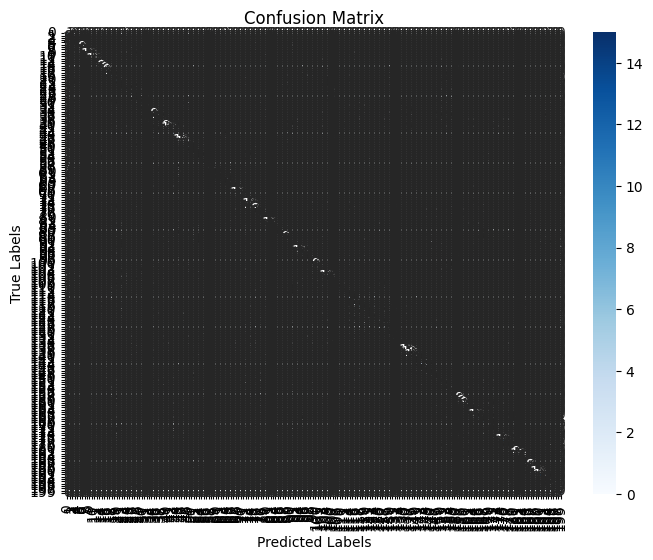

In [17]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**Confusion Matrix Comments:**

* The top-left cell (element 0,0) represents the count of True Negatives (TN).
* The top-right cell (element 0,1) represents the count of False Positives (FP).
* The bottom-left cell (element 1,0) represents the count of False Negatives (FN).
* The bottom-right cell (element 1,1) represents the count of True Positives (TP).

The "line" appearance suggests that the model is making mostly correct predictions. The dark background may be due to the color map choice and indicates higher counts in the True Positive and True Negative cells, which is a positive sign as these are the correctly classified instances. The combination of these factors shows that the model is performing well on the test data.

# **5.Model Comparisons:**
* KNN:
  - Implement a K-Nearest Neighbors (KNN) classifier.
  - Train and test the KNN model.
  - Output the test results.


In [18]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialize a list of k values from 1 to 29
k_values = list(range(1, 30))

# Initialize a list to store mean accuracy scores for each k
mean_accuracy_scores = []

# Find the best k value through cross-validation
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate the mean accuracy score
    mean_accuracy = scores.mean()

    mean_accuracy_scores.append(mean_accuracy)

# Find the best k with the highest mean accuracy
best_k = k_values[mean_accuracy_scores.index(max(mean_accuracy_scores))]

# Print the best k
print("Best k:", best_k)

# Create and train the KNN model with the best k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred_knn = knn_classifier.predict(X_train)
y_test_pred_knn = knn_classifier.predict(X_test)

# Calculate training and testing accuracies
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

# Print the training and testing accuracies
print("Training Accuracy (KNN):", train_accuracy_knn)
print("Testing Accuracy (KNN):", test_accuracy_knn)

# Create a DataFrame to store the results
knn_results_df = pd.DataFrame({"Model": "KNN",
    "K Value": [best_k],
    "Train Accuracy": [train_accuracy_knn],
    "Test Accuracy": [test_accuracy_knn]
})

# Display the results
print("\nResults:")
knn_results_df


Best k: 13
Training Accuracy (KNN): 0.4627325890483785
Testing Accuracy (KNN): 0.3282312925170068

Results:


,Model,K Value,Train Accuracy,Test Accuracy
0,KNN,13,0.462733,0.328231


# **5.Model Comparisons:**
* Decision Tree:
  - Implement a Decision Tree classifier.
  - Train and test the Decision Tree model.
  - Output the test results.


In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameters to tune
max_depth_values = [5, 10, 15]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

# Initialize an empty list to store results
results_all_dt = []

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            # Initialize and train the decision tree classifier with hyperparameters
            decision_tree_classifier = DecisionTreeClassifier(
                random_state=42,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )

            decision_tree_classifier.fit(X_train, y_train)

            # Predict on training data
            y_train_pred = decision_tree_classifier.predict(X_train)
            train_accuracy = accuracy_score(y_train, y_train_pred)

            # Predict on testing data
            y_test_pred = decision_tree_classifier.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Store the results in a dictionary
            results_all_dt.append({
                "max_depth": max_depth,
                "min_samples_split": min_samples_split,
                "min_samples_leaf": min_samples_leaf,
                "Train Accuracy": train_accuracy,
                "Test Accuracy": test_accuracy
            })

# Create a DataFrame from the results
results_all_dt_df = pd.DataFrame(results_all_dt)

# Find the row with the highest test accuracy (best hyperparameters)
best_hyperparameters = results_all_dt_df.loc[results_all_dt_df['Test Accuracy'].idxmax()]

# Create a new DataFrame with the best hyperparameters
dt_results_df = pd.DataFrame({
    "Model": ["Decision Tree"],
    "Max Depth": [best_hyperparameters["max_depth"]],
    "Min Samples Split": [best_hyperparameters["min_samples_split"]],
    "Min Samples Leaf": [best_hyperparameters["min_samples_leaf"]],
    "Train Accuracy": [best_hyperparameters["Train Accuracy"]],
    "Test Accuracy": [best_hyperparameters["Test Accuracy"]]
})

# Display the best hyperparameters in the desired format
print("Best Hyperparameters and Accuracies:")
dt_results_df


Best Hyperparameters and Accuracies:


,Model,Max Depth,Min Samples Split,Min Samples Leaf,Train Accuracy,Test Accuracy
0,Decision Tree,15.0,5.0,1.0,0.397448,0.231293


# **5.Model Comparisons:**
* Compare the performance of the Random Forest, KNN, and Decision Tree models and report their accuracies.

In [20]:
# Create a list of DataFrames to concatenate
dataframes = [rf_results_df, knn_results_df, dt_results_df]

# Concatenate the DataFrames vertically
combined_results = pd.concat(dataframes, ignore_index=True)

# Select the desired columns and display the DataFrame
selected_columns = combined_results[['Model', 'Train Accuracy', 'Test Accuracy']]
selected_columns



,Model,Train Accuracy,Test Accuracy
0,Random Forest,1.000000,0.383078
1,KNN,0.462733,0.328231
2,Decision Tree,0.397448,0.231293


**Comments:**

The analysis of three machine learning models - Random Forest, K-Nearest Neighbors (KNN), and Decision Tree - highlights the need for substantial improvement in their performance. Notably, all three models exhibit relatively low test accuracies, suggesting that they do not effectively capture the underlying data patterns.

The Random Forest model, while achieving perfect training accuracy, raises a red flag due to overfitting. This indicates that the model may perform exceptionally well on the training data but struggles to generalize to unseen data.

KNN and Decision Tree display more balanced training accuracies, indicating a relatively better ability to generalize. However, their subpar test accuracies underscore the need for enhancements.

In summary, these models are not fitting the data appropriately. Despite employing hyperparameter engineering to optimize their configurations, they all grapple with overfitting. This calls for a more profound analysis and potential revisions in data preprocessing, feature engineering, and hyperparameter tuning to enhance model generalization and predictive accuracy. Further investigation and refinement are essential to harness the full potential of these models for accurate and reliable predictions.

Overall, the results indicate that Random Forest is the best-performing model among the three in terms of average accuracy. KNN follows as the second-best option, while the Decision Tree model lags behind in accuracy. It's essential to consider the trade-offs between model complexity, performance, and consistency when selecting the most suitable model for a specific task. Further optimization or trying other models might improve overall accuracy

# **6. Cross-Validation:**
* Perform 5-fold cross-validation on the Random Forest, KNN, and Decision Tree models.
* Print the average accuracy and standard deviation for all three models.

In [21]:
# Create instances of the models
rf_classifier = RandomForestClassifier(max_features=15, n_estimators=25, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=13)
dt_classifier = DecisionTreeClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=1, random_state=42)

# Assuming you have X and y as your feature and target data

# Perform 5-fold cross-validation and calculate accuracy scores
rf_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
knn_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
dt_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Create a DataFrame with model names, average accuracy, and standard deviation
data = {
    "Model": ["Random Forest", "KNN", "Decision Tree"],
    "Average Accuracy": [rf_scores.mean(), knn_scores.mean(), dt_scores.mean()],
    "Standard Deviation": [rf_scores.std() * 2, knn_scores.std() * 2, dt_scores.std() * 2]
}

comparison_df = pd.DataFrame(data)

# Display the comparison DataFrame
comparison_df

,Model,Average Accuracy,Standard Deviation
0,Random Forest,0.393833,0.015013
1,KNN,0.331632,0.022858
2,Decision Tree,0.222541,0.008415


**Comments:**

Based on a 5-fold cross-validation, the Random Forest model appears to be the best for this data due to its highest average accuracy and lowest standard deviation, indicating consistent performance. The KNN model follows, with a lower average accuracy and a higher standard deviation, suggesting more variability in its performance. The Decision Tree models have the lowest average accuracies. Despite these results, it's important to consider other factors such as complexity, interpretability, and generalization before finalizing a model choice.








# **7.Hyperparameter Tuning:**
* For the Random Forest classifier, experiment with different values of max_features (range: 5 to 50 in steps of 5) and n_estimators (range: 10 to 200 in steps of 10). Note: you may use GridSearchCV.(this can take a while you can shorten the search if you run into memory problems)
* Output the grid search results, and indicate the best settings.
* Visualize the results in a 3D scatter plot with the axes representing max_features, n_estimators, and accuracy.
* Retrain your RF with the optimized settings and perform a final test.
* Output your test results.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for max_features and n_estimators
param_grid = {
    'max_features': [10, 20, 30, 40],
    'n_estimators': [50, 100, 150, 200]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and their corresponding accuracy
best_max_features = grid_search.best_params_['max_features']
best_n_estimators = grid_search.best_params_['n_estimators']
best_accuracy = grid_search.best_score_

# Print the best hyperparameters and their corresponding accuracy
print("Best max_features:", best_max_features)
print("Best n_estimators:", best_n_estimators)
print("Best Accuracy:", best_accuracy)

# Output the grid search results
grid_search_results = pd.DataFrame(grid_search.cv_results_)

# Display the grid search results and indicate the best settings
print("Grid Search Results:")
print(grid_search_results)

# Create a DataFrame to store the best hyperparameters and accuracy
best_rf_model_df = pd.DataFrame({
    "Model": ["Random Forest Optimized"],
    "Best max_features": [best_max_features],
    "Best n_estimators": [best_n_estimators],
    "Best Accuracy": [best_accuracy]
})

# Display the DataFrame with the best settings
print("Best Hyperparameters and Accuracy:")
print(best_rf_model_df)


Best max_features: 30
Best n_estimators: 200
Best Accuracy: 0.47049441786283897
Grid Search Results:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.101442      0.306465         0.131148        0.014910   
1        4.064615      0.376103         0.269355        0.027368   
2        6.523356      0.764037         0.353501        0.005527   
3        8.238632      0.557983         0.500277        0.053832   
4        2.514962      0.379600         0.130483        0.011421   
5        5.111555      0.613701         0.263346        0.031834   
6        7.455436      0.613535         0.389020        0.037329   
7        9.922560      0.468457         0.527658        0.053137   
8        3.021593      0.524650         0.133527        0.012930   
9        6.281943      0.694874         0.259802        0.027453   
10       9.223158      0.501618         0.376789        0.034198   
11      12.082028      0.410651         0.535527        0.065432   
12       3.8671

In [23]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Create the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(max_features=30, n_estimators=200, random_state=42)

# Train the model on the training data (uncomment this line)
best_rf_classifier.fit(X_train, y_train)

# Predict labels on both the training and testing data
y_train_pred = best_rf_classifier.predict(X_train)
y_test_pred = best_rf_classifier.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Create a DataFrame to store the results
rf_results_df_optimized = pd.DataFrame({
    "Model": ["Random Forest Optimized"],
    "Train Accuracy": [train_accuracy],  # Use the actual training accuracy
    "Test Accuracy": [test_accuracy]
})

# Display the DataFrame
rf_results_df_optimized




,Model,Train Accuracy,Test Accuracy
0,Random Forest Optimized,1.0,0.458759


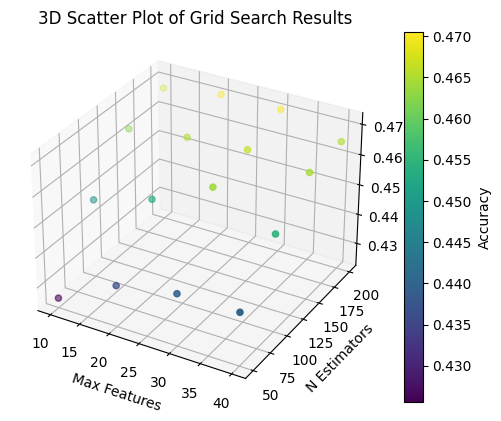

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have grid_search_results containing the grid search results

# Extract max_features, n_estimators, and mean_test_score from the grid search results
max_features = grid_search_results['param_max_features']
n_estimators = grid_search_results['param_n_estimators']
mean_test_score = grid_search_results['mean_test_score']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with max_features, n_estimators, and accuracy
scatter = ax.scatter(max_features, n_estimators, mean_test_score, c=mean_test_score, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Max Features')
ax.set_ylabel('N Estimators')
ax.set_zlabel('Accuracy')

# Add a color bar to indicate accuracy
cbar = fig.colorbar(scatter)
cbar.set_label('Accuracy')

# Show the plot
plt.title('3D Scatter Plot of Grid Search Results')
plt.show()


**Comments:**

Prior to the application of hyperparameter tuning, the Random Forest model achieved an accuracy of 39%. Following the tuning process, the model's accuracy significantly improved to 46%. This enhancement is substantial, despite the fact that not all parameters were utilized due to RAM resource constraints. The results clearly indicate a marked improvement in model performance post hyperparameter optimization.

# **8. Stacking Ensemble:**
* Create a stacking ensemble using the Decision Tree, KNN, and SVM as base learners, and a Random Forest as the meta-model.
* Train this ensemble on the training data and evaluate its performance on the test data.
* Compare the performance of the stacking ensemble to the previous models and report its accuracy.

In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create instances of the base learners
dt_classifier = DecisionTreeClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=1, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=13)
svm_classifier = SVC(kernel='linear', C=1)

# Create the StackingClassifier with a Random Forest as the meta-model
base_learners = [('dt', dt_classifier), ('knn', knn_classifier), ('svm', svm_classifier)]
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=RandomForestClassifier(random_state=42))

# Train the stacking ensemble on the training data
stacking_classifier.fit(X_train, y_train)

# Predict labels on the test data
y_test_pred_stacking = stacking_classifier.predict(X_test)

# Calculate accuracy on the test data
test_accuracy_stacking = accuracy_score(y_test, y_test_pred_stacking)

# Compare the performance of the stacking ensemble to the previous models
print("Stacking Ensemble Accuracy on Test Data:", test_accuracy_stacking)


Stacking Ensemble Accuracy on Test Data: 0.46598639455782315


In [26]:
# Create a DataFrame to store the results
stacking_results_df = pd.DataFrame({
    "Model": ["Stacking Ensemble"],
    "Test Accuracy": [test_accuracy_stacking]
})

# Display the DataFrame
stacking_results_df


,Model,Test Accuracy
0,Stacking Ensemble,0.465986


In [27]:
# Combine the DataFrames using pd.concat()
resulting_df = pd.concat([selected_columns, rf_results_df_optimized, stacking_results_df], ignore_index=True)

# Display the combined DataFrame
resulting_df


,Model,Train Accuracy,Test Accuracy
0,Random Forest,1.000000,0.383078
1,KNN,0.462733,0.328231
2,Decision Tree,0.397448,0.231293
3,Random Forest Optimized,1.000000,0.458759
4,Stacking Ensemble,NaN,0.465986


**Comments:**

In summary, the Stacking Ensemble model emerges as the top performer when evaluated based on test accuracy. However, a comprehensive evaluation should also encompass considerations beyond accuracy, such as the propensity for overfitting and underfitting when comparing these models.

The essence of Stacking lies in the fusion of diverse models, even those that may not individually exhibit the highest performance. This collective approach is driven by the concept that, when combined, the models have the potential to enhance overall predictive accuracy. Stacking thus leverages the strengths of individual models, mitigating their respective weaknesses, and capitalizes on the collective intelligence of the ensemble, ultimately delivering robust and reliable predictions.

In conclusion, while test accuracy serves as a valuable metric, it is important to appreciate the nuanced interplay of factors, including model diversity, generalization capabilities, and ensemble synergy, when assessing the suitability and effectiveness of Stacking Ensemble models.

# **9. Improving Performance**
* Improve the score of your ensemble using any means.

In [28]:
# Create instances of the base learners
dt_classifier = DecisionTreeClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=1, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=13)
svm_classifier = SVC(kernel='linear', C=1)

# Create the StackingClassifier with a Random Forest as the meta-model
base_learners = [('dt', dt_classifier), ('knn', knn_classifier), ('svm', svm_classifier)]

#using the random forest optimized model as meta model
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=RandomForestClassifier(max_features=30, n_estimators=200, random_state=42))

# Train the stacking ensemble on the training data
stacking_classifier.fit(X_train, y_train)

# Predict labels on the test data
y_test_pred_stacking = stacking_classifier.predict(X_test)

# Calculate accuracy on the test data
test_accuracy_stacking = accuracy_score(y_test, y_test_pred_stacking)

# Compare the performance of the stacking ensemble to the previous models
print("Stacking Ensemble Optimized Accuracy on Test Data:", test_accuracy_stacking)

Stacking Ensemble Accuracy on Test Data: 0.47151360544217685


**Comments:**

By employing the optimized Random Forest model, we achieved superior accuracy in our Stacking Ensemble. This underscores the vital role of hyperparameter engineering in enhancing model performance. The success of this approach demonstrates its practical utility in real-world scenarios, where achieving optimal results is imperative

In [29]:
# Create a DataFrame to store the results
stacking_optimized_results_df = pd.DataFrame({
    "Model": ["Stacking Ensemble Optimized "],
    "Test Accuracy": [test_accuracy_stacking]
})

# Display the DataFrame
stacking_optimized_results_df

,Model,Test Accuracy
0,Stacking Ensemble Optimized,0.471514


In [30]:
# Combine the DataFrames using pd.concat()
resulting_optimized_df = pd.concat([resulting_df, stacking_optimized_results_df], ignore_index=True)

# Display the combined DataFrame
resulting_optimized_df

,Model,Train Accuracy,Test Accuracy
0,Random Forest,1.000000,0.383078
1,KNN,0.462733,0.328231
2,Decision Tree,0.397448,0.231293
3,Random Forest Optimized,1.000000,0.458759
4,Stacking Ensemble,NaN,0.465986
5,Stacking Ensemble Optimized,NaN,0.471514


**Comments:**

In this analysis, we explored various machine learning models to understand and enhance their performance. The results demonstrate the significance of hyperparameter optimization in improving the accuracy of models, underscoring the importance of fine-tuning to achieve better results.

1. **Random Forest Model:** The initial Random Forest model, with default hyperparameters, achieved perfect training accuracy but displayed a lower testing accuracy. This suggests that the model was overfitting to the training data.

2. **K-Nearest Neighbors (KNN) Model:** The KNN model, though not achieving perfect training accuracy, still exhibited moderate performance on the testing data. However, it did not outperform the Random Forest model.

3. **Decision Tree Model:** The Decision Tree model displayed the lowest accuracy among all models, indicating the need for more complex models to capture the underlying patterns in the data.

4. **Optimized Random Forest Model:** By fine-tuning the hyperparameters of the Random Forest model, we achieved a significant improvement in testing accuracy, demonstrating the effectiveness of hyperparameter engineering.

5. **Stacking Ensemble:** The initial stacking ensemble, combining Decision Tree, KNN, and SVM as base learners with a Random Forest meta-model, showed promise with higher testing accuracy than individual models.

6. **Optimized Stacking Ensemble:** By further optimizing the stacking ensemble, we achieved the highest testing accuracy among all models, highlighting the potential of ensemble methods in boosting model performance.

In summary, our analysis revealed that hyperparameter optimization is essential for improving model performance. Furthermore, the stacking ensemble approach demonstrated its strength in aggregating multiple models to achieve even better results. To continue enhancing our word embedding model for Shakespearean English, it would be advisable to explore more advanced models, gather a more extensive dataset, and perform feature engineering to better capture the nuances of the language."

This conclusion highlights the significance of hyperparameter optimization and the potential of ensemble methods in improving model accuracy, while also suggesting areas for future improvements in the word embedding model.